<a href="https://colab.research.google.com/github/HosseinEyvazi/MLOps/blob/main/2_Containerization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dockerize Your Project (1-Minute Guide)

## 1. Create `Dockerfile`
```dockerfile
FROM python:3.11-slim
WORKDIR /app
COPY requirements.txt .
RUN pip install -r requirements.txt
COPY . .
EXPOSE 8000
CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000"]
```

## 2. Build Image
```bash
docker build -t my-ml-api .
```

## 3. Run Container
```bash
docker run -p 8000:8000 my-ml-api
```

## Complete Workflow
```bash
# 1. Build (creates image)
docker build -t my-ml-api .

# 2. Run (maps port 8000)
docker run -p 8000:8000 my-ml-api

# 3. Test (same as before!)
http://localhost:8000/docs
```

## Key Points
```
-p 8000:8000  ← Maps host port 8000 → container port 8000
--host 0.0.0.0 ← Makes API accessible outside container
```

## Verify
```bash
docker ps           # Running containers
docker images       # Your image: my-ml-api
curl localhost:8000/health
```

```
Your laptop → Docker → YOUR API (Identical everywhere!)
```

**Done!** Your ML API now runs **identically on any Docker machine** (laptop, <span style="font-size: 2.5em; font-weight: bold;">**SERVER**</span>, cloud). 🚀

```
No more: "Works on my machine but not production"
```

# Dockerfile (1-Minute Placement Guide)

## 1. Location
**Put `Dockerfile` in your PROJECT ROOT** (same folder as `app.py`):

```
your_project/
├── Dockerfile          ← HERE (no extension!)
├── app.py
├── model.pkl
├── requirements.txt
└── templates/
```

## 2. Filename
```
Dockerfile  ← NO extension (.txt, .docker, etc.)
Capital D, lowercase f
```

## 3. How to Use It
**Docker finds it automatically** in current directory:

```bash
# From your project folder:
docker build -t myapp .     # "." = current directory = finds Dockerfile
```

## Complete Example
```
my_ml_project/
├── Dockerfile              # ← Add here
├── app.py
├── california_housing_model.pkl
├── requirements.txt
└── templates/
    └── index.html

# Terminal (in my_ml_project/):
docker build -t housing-api .
docker run -p 8000:8000 housing-api
```

## Quick Dockerfile Content
```dockerfile
FROM python:3.11-slim
WORKDIR /app
COPY requirements.txt .
RUN pip install -r requirements.txt
COPY . .
EXPOSE 8000
CMD ["uvicorn", "app:app", "--host", "0.0.0.0"]
```

```
1. Create file: Dockerfile (root)
2. Write content above
3. docker build -t myapp .
4. docker run -p 8000:8000 myapp
```

**Done!** Docker reads `Dockerfile` from current directory automatically 🚀

# Docker (1-Minute Guide)

## Core Concept
**Docker packages your app + dependencies into a portable "box"** that runs **identically anywhere**.

```
Docker = "Your app works on ANY machine with Docker"
No more: "Works on my machine!"
```

## Docker Layers
```
Image → Container (Running Image)
Dockerfile → docker build → Image → docker run → Container
```

## Essential Commands

| Command | Purpose | Example |
|---------|---------|---------|
| **`docker ps`** | **Running** containers | `abc123 myapi Up 2m` |
| **`docker ps -a`** | **All** containers (stopped too) | `def456 myapi Exited` |
| **`docker images`** | Local images | `myapi latest 250MB` |
| **`docker build -t myapp .`** | **Build** image from Dockerfile | Creates `myapp` image |
| **`docker run -p 8000:8000 myapp`** | **Run** container | Maps port, starts API |
| **`docker rmi myapp`** | **Delete** image | Removes `myapp` |
| **`docker stop abc123`** | **Stop** running container | Stops by ID |
| **`docker rm abc123`** | **Delete** stopped container | Cleans up |

## Docker Runs **ON YOUR DEVICE**
```
Your Laptop (Windows/Mac/Linux) → Docker Engine → Your App (Isolated)

Docker shares YOUR OS kernel → Fast + Lightweight (vs VMs)
```

## Workflow
```bash
1. docker build -t ml-api .       # Build once
2. docker run -p 8000:8000 ml-api # Run anywhere
3. docker ps                      # Check running
4. docker stop <id>              # Stop when done
```

## Why Docker?
```
✅ Same env: Laptop → Server → Cloud
✅ No deps hell: pip conflicts solved
✅ Scale easy: 1 container → 1000 containers
✅ Reproducible: "docker run" = identical result
```

```
docker build → IMAGE (Portable App)
docker run → CONTAINER (Running App on YOUR device)
```

**Result**: **Your ML API runs identically everywhere** 🚀

# FastAPI Auto-Docs (1-Minute Guide)

## What?
FastAPI **automatically generates** interactive API documentation at **`/docs`** and **`/redoc`**.

```
Run your API → http://127.0.0.1:8000/docs → Interactive Playground
```

## How It Works
**Pydantic + Type Hints** → **Swagger UI** (OpenAPI standard)

```python
class TextInput(BaseModel):
    text: str  # Type hints create the docs!

@app.post("/predict")
async def predict(data: TextInput):  # Docs generated automatically!
    return {"class": "spam"}
```

## 2 Endpoints (Both Auto-Created)

| URL | Tool | Style |
|-----|------|-------|
| **`/docs`** | **Swagger UI** | Interactive forms, "Try it" buttons |
| **`/redoc`** | **ReDoc** | Clean documentation, copyable cURL |

## Testing Workflow

### 1. **Swagger UI** (`/docs`)
```
1. Click POST /predict
2. Click "Try it out"
3. Fill JSON: {"text": "Hello world"}
4. Click "Execute"
5. See response instantly!
```

### 2. **Copy cURL Commands**
```
Right-click → Copy as cURL → Paste in terminal
curl -X POST "http://localhost:8000/predict" -d '{"text": "test"}'
```

## Your Project Example
```
http://127.0.0.1:8000/docs
↓ Click POST /predict ↓
"Try it out" → {"text": "God is great"} → Execute →
Response: {"predicted_class": "religion", "confidence": 0.85}
```

## Key Benefits

| Feature | Value |
|---------|-------|
| **No Extra Code** | Type hints = instant docs |
| **Interactive** | Test without Postman |
| **Shareable** | Send `/docs` link to frontend team |
| **Always Updated** | Docs match your code exactly |

## Pro Tips

```python
# Better docs
@app.post("/predict", summary="Classify text language")
async def predict(data: TextInput):
    """Predicts language category (religion/politics/etc).
    
    Returns confidence score and model version.
    """
    return result
```

```
summary = Short title in docs
Description = Long explanation below
```

## 📝 Testing Flow

```
1. python app.py
2. Open http://127.0.0.1:8000/docs
3. Click endpoints → Try it out → Execute
4. Copy cURL for automation
5. Share /docs link with team
```

**Result**: **Zero setup** → **Production-ready docs** → **Team loves it** 🚀

```
Postman? ❌ Manual work
FastAPI /docs? ✅ Automatic + Interactive
```


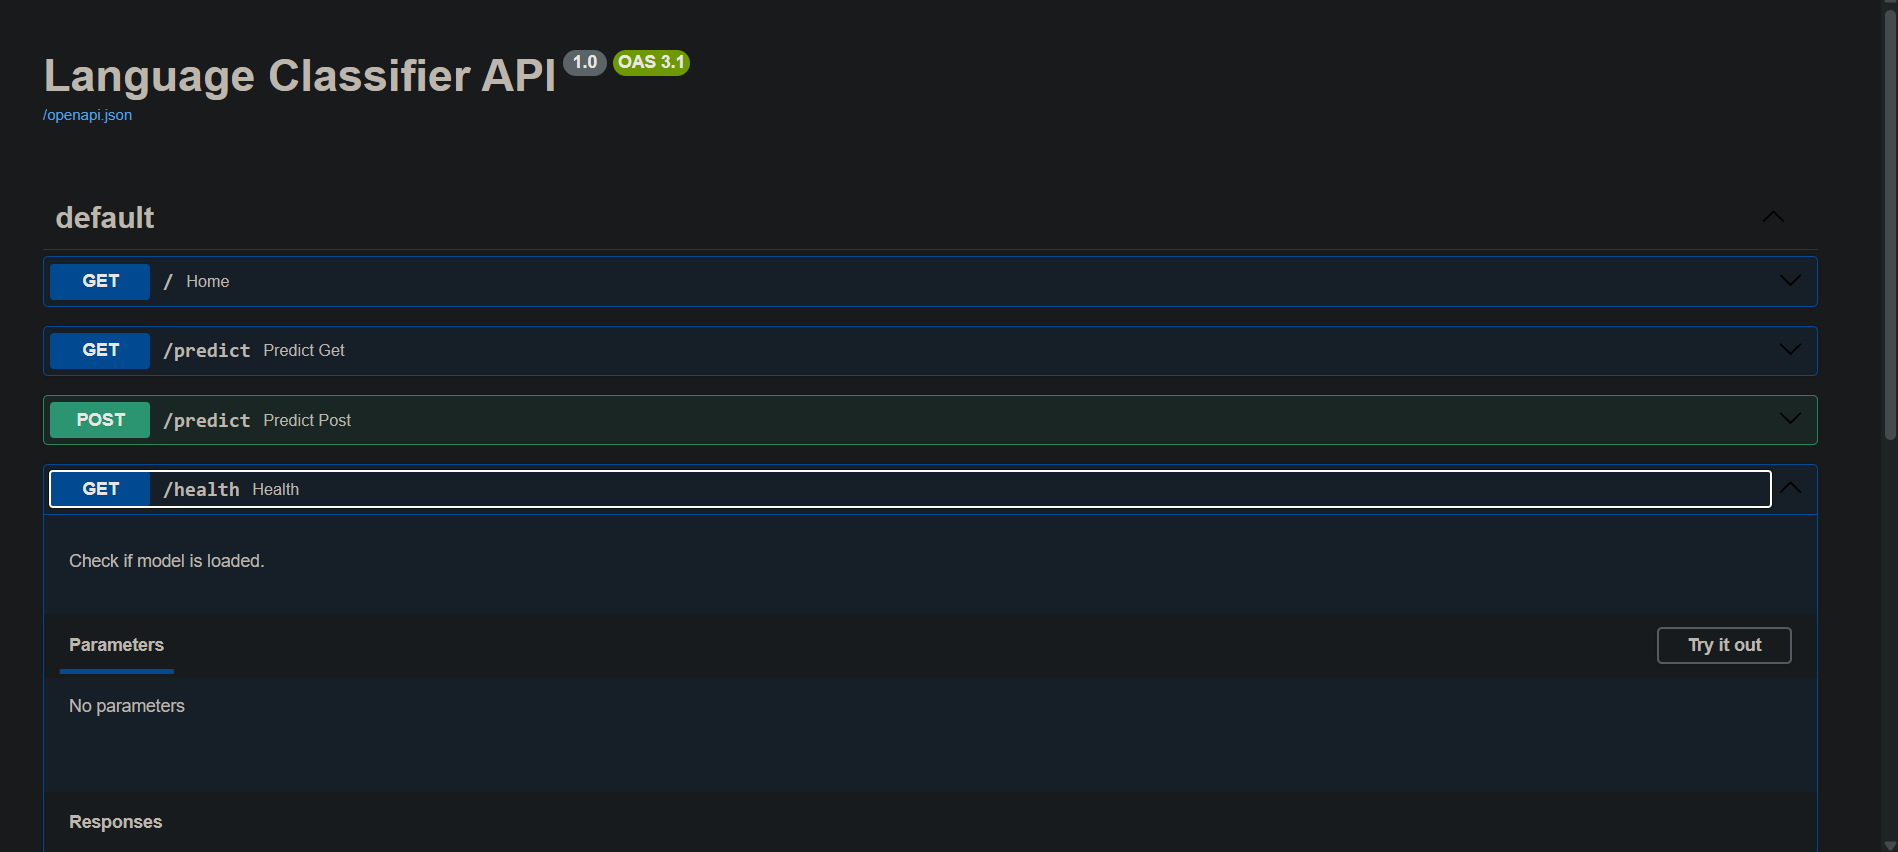

# Pydantic `BaseModel` (1-Minute Guide)

## What?
**Pydantic** is a **data validation library**. `BaseModel` defines the **structure** your API expects.

```python
from pydantic import BaseModel

class TextInput(BaseModel):
    text: str  # Must be a string
```

## Why in FastAPI?
**Automatic Validation + Error Handling**:

```
User sends: {"text": "hello", "extra": 123}  ❌ Invalid
Pydantic → 422 Error: "extra" field not allowed
User sends: {"text": null}                   ❌ Invalid  
Pydantic → 422 Error: "text" must be string
User sends: {"text": "hello"}                ✅ Valid
FastAPI → Calls your function
```

## Your Project Example

```python
@app.post("/predict")
async def predict_post(input_data: TextInput):  # 👈 Pydantic validates this
    return classifier.predict(input_data.text)
```

**Without Pydantic** (manual validation):
```python
@app.post("/predict")
async def predict_post(request: Request):
    data = await request.json()
    if "text" not in data or not isinstance(data["text"], str):
        return {"error": "Invalid input"}  # Manual work!
    return classifier.predict(data["text"])
```

## Auto-Generated Docs
FastAPI uses Pydantic to create **interactive docs** at `/docs`:
```
POST /predict
Body: {"text": "string"}  ← Schema shown automatically
```

## Key Benefits

| Without Pydantic | With Pydantic |
|------------------|---------------|
| Manual validation | **Automatic** |
| Custom error code | **Standard 422** |
| No docs | **Auto-generated** |
| Runtime crashes | **Type-safe** |

```
Raw JSON → Pydantic Validation → Your Function → Response
```

**Result**: **Bulletproof API** that rejects bad data before it reaches your model. 🚀

# JavaScript in HTML (1-Minute Guide)

## What?
**JavaScript** runs **in the browser** to make your HTML **interactive** without page reloads.

```
HTML = Structure    CSS = Style    JavaScript = Behavior
```

## Why Use JS in ML APIs?
- **No Page Reload**: POST requests show results instantly.
- **Rich UX**: Dynamic forms, loading spinners, real-time updates.
- **Modern**: Single Page Apps (React, Vue) use this pattern.

## Core Pattern (Your Project)

### 1. HTML Elements (Targets)
```html
<textarea id="postText"></textarea>     <!-- Input -->
<button onclick="predictPost()">Go</button>  <!-- Trigger -->
<div id="result" style="display:none;"></div> <!-- Output -->
```

### 2. JavaScript Logic
```javascript
async function predictPost() {
    // 1. Get input
    const text = document.getElementById("postText").value;
    
    // 2. Call API (no page reload!)
    const response = await fetch("/predict", {
        method: "POST",
        headers: { "Content-Type": "application/json" },
        body: JSON.stringify({ text })
    });
    
    // 3. Update UI
    const data = await response.json();
    document.getElementById("resultClass").textContent = data.predicted_class;
    document.getElementById("result").style.display = "block";
}
```

## Your Project Flow

```
User Types → Clicks Button → JS Calls POST /predict
    ↓
FastAPI → model.predict() → JSON Response
    ↓
JS → Updates HTML → Result Appears (No Reload!)
```

```
GET Form:     Page Reload (Traditional)
POST + JS:    Instant Response (Modern SPA)
```

## Key JS Methods

| Method | Purpose |
|--------|---------|
| `document.getElementById("id")` | Find HTML element |
| `fetch("/predict")` | HTTP request |
| `JSON.stringify(data)` | Convert object → JSON |
| `await response.json()` | JSON → object |
| `element.textContent = value` | Update HTML content |

## 📝 3-Step Pattern

```javascript
1. Get:  document.getElementById("input").value
2. Send: fetch("/api", {method: "POST", body: JSON.stringify(data)})
3. Show: document.getElementById("result").textContent = response.data
```

**Result**: Your ML model + modern web UX = **Production Ready API** 🚀

# `.pkl` Files (1-Minute Guide)

## What?
**Binary Python object storage**. Saves trained models to disk.

```
joblib.dump(model, "model.pkl")
model = joblib.load("model.pkl")
```

## Why?
- **Train once**, deploy forever
- **Portable** across machines
- **Fast** loading

## **Key Point: Scikit-Learn Objects**
**If you save a Scikit-Learn model, you get ALL its attributes back**:

```python
model = joblib.load("sklearn_model.pkl")
model.predict(X)        # Predictions
model.predict_proba(X)  # Confidence
model.score(X, y)       # Accuracy
model.classes_          # Class names
model.feature_names_in_ # Feature names
# All original methods/attributes restored!
```

## Extensions
- **`.pkl`** - Standard
- **`.joblib`** - Large NumPy arrays
- **`.pickle`** - Explicit

## Best Practice
```python
# Save WITH metadata
joblib.dump({"model": pipeline, "version": "v1"}, "model_v1.pkl")
```

**⚠️ Never load untrusted `.pkl` files** (can execute code).

```
Train → .pkl → FastAPI → Production
```

# Project Documentation: Text Language Classification API

## 1. Overview
This project demonstrates a **_Complete_MLOps_Pipeline_** for **text classification**. It classifies input text into predefined categories (Atheism, Religion, Politics) using a **_Scikit-Learn_** machine learning model with **_Model_Versioning_**.

The system follows the **_Separation_of_Concerns_** principle:
- **`train_model.py`**: Generates versioned model artifacts.
- **`model.py`**: Encapsulates preprocessing + prediction logic.
- **`app.py`**: Exposes the model via FastAPI (GET & POST).

This architecture ensures **_Scalability_**, **_Maintainability_**, and **_Reproducibility_**.

## 2. Tech Stack
- **_ML_Framework_**: **Scikit-Learn** (Pipeline, TF-IDF, Naive Bayes).
- **_Web_Framework_**: **FastAPI** (async, automatic routing, validation).
- **_Serialization_**: **Joblib** (model artifact storage with versioning).
- **_Data_Validation_**: **Pydantic** (request body schema validation).
- **_Template_Engine_**: **Jinja2** (optional HTML form).

## 3. File Structure & Responsibilities

```text
/language_classifier/
├── train_model.py              # Model Training & Serialization
├── model.py                    # Model Loading & Prediction Pipeline
├── app.py                      # FastAPI Routes (GET / POST)
├── requirements.txt            # Python Dependencies
├── models/                      # Model Storage (Versioned)
│   └── language_classifier_v1.pkl
└── templates/                  # Frontend (Optional)
    └── index.html
```

### File Responsibilities

| File | Purpose | Output/Input |
|------|---------|--------------|
| **`train_model.py`** | Train classifier on 20newsgroups dataset | **Output**: `models/language_classifier_v1.pkl` |
| **`model.py`** | Load model + handle preprocessing + prediction | **Input**: Raw text; **Output**: Classification result |
| **`app.py`** | Expose model via HTTP endpoints | **Input**: GET/POST requests; **Output**: JSON |
| **`requirements.txt`** | List all Python dependencies | **Used by**: `pip install -r requirements.txt` |

## 4. Model Versioning Strategy

Each trained model is saved with an explicit version number in the filename:

```python
model_path = f"models/language_classifier_{model_version}.pkl"
# Example: language_classifier_v1.pkl, language_classifier_v2.pkl
```

**Benefits**:
- **Rollback**: Revert to `v1.pkl` if `v2.pkl` underperforms.
- **A/B Testing**: Run `v1` and `v2` simultaneously.
- **Audit Trail**: Track which version made predictions.

**Artifact Structure** (saved as dictionary):
```json
{
  "model": <Pipeline>,
  "version": "v1",
  "classes": ["alt.atheism", "soc.religion.christian", "talk.politics.guns"],
  "feature_count": 1000
}
```

## 5. Data Flow Architecture

### Training Phase (One-Time)
```
Dataset (20newsgroups)
    ↓
[Feature Extraction: TF-IDF]
    ↓
[Train: Naive Bayes Classifier]
    ↓
[Serialize: joblib.dump()]
    ↓
models/language_classifier_v1.pkl
```

### Inference Phase (Per-Request)
```
User Input (Text)
    ↓
[model.py: Load Pipeline]
    ↓
[Preprocess: Strip whitespace, validate]
    ↓
[Pipeline: TF-IDF transform + Classify]
    ↓
[Return: {class, confidence, version}]
    ↓
FastAPI → JSON Response
```

## 6. API Endpoints

### Endpoint 1: `GET /`
- **Purpose**: Serve the HTML form (optional).
- **Trigger**: Browser visits `http://127.0.0.1:8000`
- **Response**: HTML page with two classification forms.
- **Status**: `200 OK`

### Endpoint 2: `GET /predict` (Query Parameter Method)
- **Purpose**: Classify text via URL query parameter.
- **Trigger**: User submits GET form or visits directly.
- **URL Example**:
  ```
  GET /predict?text=God%20is%20great
  ```
- **Flow**:
  1. FastAPI extracts `text` from query params.
  2. Calls `classifier.predict(text)`.
  3. Returns JSON result.
- **Response**:
  ```json
  {
    "text": "God is great",
    "predicted_class": "soc.religion.christian",
    "confidence": 0.8234,
    "version": "v1",
    "all_classes": ["alt.atheism", "soc.religion.christian", "talk.politics.guns"]
  }
  ```
- **When to Use**: Simple inputs, bookmarkable URLs.

### Endpoint 3: `POST /predict` (Request Body Method)
- **Purpose**: Classify text via JSON body (recommended for production).
- **Trigger**: POST request with JSON body.
- **Request**:
  ```bash
  curl -X POST "http://127.0.0.1:8000/predict" \
    -H "Content-Type: application/json" \
    -d '{"text": "I love programming"}'
  ```
- **Flow**:
  1. Pydantic validates JSON matches `TextInput` schema.
  2. Calls `classifier.predict(text)`.
  3. Returns JSON result.
- **Response**: Same as GET (see above).
- **When to Use**: Complex inputs, secure data (HTTPS), production APIs.

### Endpoint 4: `GET /health`
- **Purpose**: Check if model is loaded and API is healthy.
- **Response**:
  ```json
  {
    "status": "ok",
    "model_version": "v1"
  }
  ```
- **Use Case**: Docker health checks, monitoring systems.

## 7. Core Components Explained

### 7.1 `LanguageClassifier` Class (in `model.py`)
Encapsulates all preprocessing and prediction logic.

**Methods**:
- **`__init__(model_path)`**: Load model from disk.
- **`_load()`**: Read `.pkl` file, extract components.
- **`preprocess(text)`**: Clean input (strip, validate).
- **`predict(text)`**: Preprocess → Pipeline → Format result.

**Why Encapsulation?**
- *Reusability*: Can import and use in multiple files.
- *Testability*: Easy to unit test.
- *Maintenance*: Changes to preprocessing affect only one place.

### 7.2 Pydantic Model (in `app.py`)
```python
class TextInput(BaseModel):
    text: str
```
**Purpose**: Validate POST request body structure. If JSON doesn't match schema, FastAPI returns `422 Unprocessable Entity` with details.

### 7.3 Global Classifier (in `app.py`)
```python
classifier = None

def load_classifier():
    global classifier
    classifier = LanguageClassifier(MODEL_PATH)

load_classifier()  # Called on startup
```
**Why Global?**
- Model loaded **once** at startup (expensive I/O operation).
- Reused across all requests (efficient).
- Scope accessible to all route functions.

### 7.4 Pipeline (in `train_model.py`)
```python
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(...)),
    ('classifier', MultinomialNB())
])
```
**Importance**: Ensures preprocessing is **identical** between training and inference (prevents **_Training_Serving_Skew_**).

## 8. Comparison: GET vs POST

| Aspect | **GET /predict** | **POST /predict** |
|--------|-----------------|-------------------|
| **HTTP Method** | GET | POST |
| **Data Location** | URL query params (`?text=...`) | JSON body |
| **Security** | Low (logged everywhere) | High (encrypted if HTTPS) |
| **Bookmarkable** | ✅ Yes | ❌ No |
| **Text Limit** | ~2000 chars | No limit |
| **Use Case** | Quick tests, simple inputs | Production, complex inputs |
| **Frontend** | HTML form with `method="get"` | JavaScript `fetch()` with POST |

## 9. Model Serialization & Versioning

### Why Save as Dictionary?
Instead of just saving the pipeline:
```python
joblib.dump(pipeline, "model.pkl")  # ❌ No metadata
```

We save with metadata:
```python
artifact = {
    "model": pipeline,
    "version": "v1",
    "classes": ["class1", "class2"],
    "feature_count": 1000
}
joblib.dump(artifact, "model.pkl")  # ✅ Includes context
```

**Benefits**:
- Track model version automatically.
- Store class names (useful for API responses).
- Record training parameters (feature count, hyperparameters).

### Versioning Workflow
```
v1.pkl (current)
    ↓ Retrain with new data
v2.pkl (better accuracy)
    ↓ Update app.py: MODEL_PATH = "...v2.pkl"
    ↓ Restart API
Old v1.pkl kept as fallback
```

## 10. Error Handling

### Error Scenarios

| Scenario | Status Code | Response |
|----------|-------------|----------|
| Model not loaded | `500` | `{"error": "Model not loaded"}` |
| Empty text input | `400` | `{"error": "Input text cannot be empty"}` |
| Invalid JSON (POST) | `422` | Pydantic validation error |
| Server crash | `500` | FastAPI error details |

**Example Error**:
```bash
curl -X POST "http://127.0.0.1:8000/predict" \
  -H "Content-Type: application/json" \
  -d '{"text": ""}'

# Response:
{"error": "Input text cannot be empty"}
```

## 11. Deployment Instructions

### Step 1: Create Virtual Environment (Optional but Recommended)
```bash
python -m venv venv
source venv/bin/activate  # On Windows: venv\Scripts\activate
```

### Step 2: Install Dependencies
```bash
pip install -r requirements.txt
```

### Step 3: Train Model
```bash
python train_model.py
# Output: ✅ Model saved: models/language_classifier_v1.pkl
```

### Step 4: Run API Server
```bash
python app.py
# Output: Uvicorn running on http://127.0.0.1:8000
```

### Step 5: Test Endpoints

**Test Health Check**:
```bash
curl http://127.0.0.1:8000/health
```

**Test GET Endpoint**:
```bash
curl "http://127.0.0.1:8000/predict?text=God%20is%20great"
```

**Test POST Endpoint**:
```bash
curl -X POST "http://127.0.0.1:8000/predict" \
  -H "Content-Type: application/json" \
  -d '{"text": "I love politics"}'
```

**View Auto-Generated Docs**:
```
http://127.0.0.1:8000/docs
```

## 12. Production Considerations

### 12.1 Load Testing
Your API should handle **concurrent requests**:
```bash
# Using Apache Bench
ab -n 1000 -c 50 "http://127.0.0.1:8000/health"
# -n: total requests, -c: concurrent requests
```

### 12.2 Monitoring
Add logging to detect issues:
```python
import logging
logger = logging.getLogger(__name__)

@app.post("/predict")
async def predict_post(input_data: TextInput):
    logger.info(f"Prediction request: {input_data.text[:50]}")
    result = classifier.predict(input_data.text)
    logger.info(f"Result: {result['predicted_class']}")
    return result
```

### 12.3 Model Switching
To use `v2.pkl`:
```python
# In app.py, change:
MODEL_PATH = "models/language_classifier_v2.pkl"
# Restart the API
```

## 📝 Summary Table

| Component | Purpose | File |
|-----------|---------|------|
| **Training** | Generate versioned model artifact | `train_model.py` |
| **Model Class** | Load + preprocess + predict | `model.py` |
| **API Routes** | Expose endpoints (GET/POST) | `app.py` |
| **Validation** | Enforce request schema | `app.py` (Pydantic) |
| **Serialization** | Store model with metadata | `models/*.pkl` |

## Next Steps
- **Module 3**: Dockerize this API (`Dockerfile`, `docker build`, `docker run`).
- **Module 4**: Deploy to cloud (AWS, Google Cloud, Azure).
- **Module 5**: Add CI/CD (GitHub Actions, GitLab CI).

***

**Key Takeaway**: This project separates concerns (training, inference, serving), uses versioning, supports multiple input methods (GET/POST), and is ready for production deployment. 🚀